# Assignment 4
Emily Strong

For this assignment I am combining my data set, [FaceScrub](http://vintage.winklerbros.net/facescrub.html), with the [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) to create a human face detection CNN. It is a binary classifier of face/no face. I chose the CIFAR-10 because 6 of the 10 categories are animals which will help ensure that the model specifically detects human faces instead of over generalizing or detecting a particular feature (eg eyes) instead.

In [1]:
import numpy as np
import os
from PIL import Image
import pandas as pd
import random

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


# Pre-Processing
I used convert.py to resize the aligned images generated by the OpenFace pipeline from my project. I then randomly selected 50,000 of them to use in the training set. I added to this 50,000 images from the [CIFAR-10](https://www.kaggle.com/c/cifar-10). Keras comes with CIFAR-10 as one of the built-in data sets however I chose to directly download them instead to ensure they would be in the same format as the face images. Each of these images needs to be converted into an RGB numpy array and labeled as face (1) or no face (0).

### 1) Create list of files

In [26]:
files = []
for filename in os.listdir('train'):
    files.append(filename)

random.shuffle(files)
files[0]

'amaury-nolasco1600.png'

### 2) Convert images to numpy arrays and create list of labels

In [27]:
images = []
labels = []
for filename in files:
    name = 'train/'+filename
    img = Image.open( name )
    img.load()
    images.append(np.asarray(img)) 
    if '-' in filename:
        labels.append(1)
    else:
        labels.append(0)

In [28]:
images[0]

array([[[ 58,  54,  45],
        [ 71,  58,  44],
        [ 83,  63,  47],
        ..., 
        [102,  83,  73],
        [ 98,  78,  69],
        [ 82,  70,  61]],

       [[ 55,  50,  43],
        [ 72,  62,  49],
        [ 82,  65,  50],
        ..., 
        [ 97,  84,  67],
        [100,  87,  71],
        [ 79,  70,  56]],

       [[ 51,  48,  42],
        [ 73,  68,  58],
        [ 75,  63,  48],
        ..., 
        [ 95,  85,  61],
        [ 96,  88,  67],
        [ 79,  69,  50]],

       ..., 
       [[ 21,  19,  14],
        [ 33,  29,  21],
        [ 46,  40,  32],
        ..., 
        [ 60,  48,  33],
        [129, 130, 123],
        [255, 255, 255]],

       [[ 27,  25,  21],
        [ 35,  31,  24],
        [ 60,  53,  43],
        ..., 
        [ 72,  60,  48],
        [ 29,  30,  25],
        [166, 167, 162]],

       [[ 62,  60,  56],
        [ 27,  23,  15],
        [ 81,  72,  59],
        ..., 
        [ 64,  50,  41],
        [ 26,  26,  26],
        [ 37,  38,

In [29]:
labels

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [30]:
X = np.asarray(images)

In [31]:
X.shape

(100000, 32, 32, 3)

In [32]:
Y = np.asarray(labels)
Y.shape

(100000,)

### 3) Save the image arrays and labels

In [33]:
# https://wiki.python.org/moin/UsingPickle
import pickle
pickle.dump( X, open( "imagearray.pkl", "wb" ) )
pickle.dump( Y, open( "imagearray_labels.pkl", "wb" ) )

In [34]:
pickle.dump(files, open("filenames.pkl", "wb"))

### 4) Import pickle files whenever the kernel is restarted

In [2]:
import pickle

X = pickle.load( open( "imagearray.pkl", "rb" ) )
Y = pickle.load(open("imagearray_labels.pkl", "rb"))

### 5) Check that image arrays are readable

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


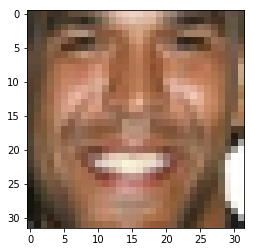

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plotData = X[0]
plt.imshow(plotData)
plt.show()

# Part A: Deep Learning Model
I am creating a convolutional neural network using keras adapted from:
* https://github.com/nikbearbrown/NEU_COE/blob/master/CSYE_7245/Week_12/02_Convolutional_Neural_Network.ipynb 
* https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
!pip install Tensorboard

In [3]:
from time import time
from keras.callbacks import TensorBoard

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))

/home/ubuntu/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

In [6]:
# Set the parameters
batch_size = 32
num_classes = 1
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models/0')
model_name = 'keras_facedetection.h5'

In [6]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [7]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [14]:
# Initialize model
model=Sequential()

# Add convolution layer
model.add(Conv2D(32, (5,5), padding='same', input_shape = X_train.shape[1:]))

In [15]:
model.add(Activation('relu'))

# Add second convolution
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [16]:
# Add third convolution
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# Add fourth convolution
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Add second pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
model.add(Dropout(0.25))

In [17]:
# Add dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Add final dense layer 
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [18]:
# Add optimizer
opt=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [19]:
# Scale data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
X_train_t = X_train[0:20000]
Y_train_t = Y_train[0:20000]

In [26]:
model.fit(X_train_t, Y_train_t, batch_size = batch_size, epochs=epochs, validation_data=(X_test, Y_test), shuffle=True, verbose=1, callbacks=[tensorboard])

Train on 20000 samples, validate on 25000 samples
Epoch 1/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 2/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 3/100
20000/20000 [==============================] - 112s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 4/100
20000/20000 [==============================] - 112s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 5/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 6/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 7/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.

In [27]:
save_dir = os.path.join(os.getcwd(), 'saved_models/0')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/0/keras_facedetection.h5 


In [28]:
# Score trained model.
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 30s 1ms/step
Test loss: 7.883190855102539
Test accuracy: 0.50552


## Attempt 2
The model failed to train on the data and is performing at chance. I'm going to change the first convolutional layer to use 5x5 convolutions rather than 3x3. I am also increasing the learning rate from .0001 to .001.

In [42]:
# Initialize model
model2=Sequential()

# Add convolution layer
model2.add(Conv2D(32, (5,5), padding='same', input_shape = X_train.shape[1:]))
model2.add(Activation('relu'))

# Add second convolution
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))

# Add pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# Add third convolution
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))

# Add fourth convolution
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))

# Add second pooling
model2.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
model2.add(Dropout(0.25))

# Add dense layer
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))

# Add final dense layer 
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

# Add optimizer
opt=keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Compile model
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [43]:
model2.fit(X_train_t, Y_train_t, batch_size = batch_size, epochs=epochs, validation_data=(X_test, Y_test), shuffle=True, verbose=1, callbacks=[tensorboard])

Train on 20000 samples, validate on 25000 samples
Epoch 1/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 2/100
20000/20000 [==============================] - 110s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 3/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 4/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 5/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 6/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.8832 - val_acc: 0.5055
Epoch 7/100
20000/20000 [==============================] - 111s 6ms/step - loss: 7.9361 - acc: 0.5022 - val_loss: 7.

KeyboardInterrupt: 

## Attempt 3
The model is again performing at chance. I am adding in an image data generator which normalizes and creates modified versions of the images to increase the sample size.

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [46]:
# Adapted from:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# augmentation configuration for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# augmentation configuration for testing:
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size) 


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)


In [47]:
# Initialize model
model3=Sequential()

# Add convolution layer
model3.add(Conv2D(32, (5,5), padding='same', input_shape = X_train.shape[1:]))
model3.add(Activation('relu'))

# Add second convolution
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))

# Add pooling
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

# Add third convolution
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))

# Add fourth convolution
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))

# Add second pooling
model3.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
model3.add(Dropout(0.25))

# Add dense layer
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))

# Add final dense layer 
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

# Add optimizer
opt=keras.optimizers.rmsprop(lr=0.001, decay=1e-6)

# Compile model
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [49]:
model3.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/50
2000/2000 [==============================] - 167s 83ms/step - loss: 7.9433 - acc: 0.5018 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 2/50
2000/2000 [==============================] - 167s 83ms/step - loss: 7.9876 - acc: 0.4990 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 3/50
2000/2000 [==============================] - 167s 83ms/step - loss: 8.0429 - acc: 0.4955 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 4/50
2000/2000 [==============================] - 167s 84ms/step - loss: 8.0061 - acc: 0.4978 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 5/50
2000/2000 [==============================] - 167s 84ms/step - loss: 7.9951 - acc: 0.4985 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 6/50
2000/2000 [==============================] - 167s 84ms/step - loss: 7.9981 - acc: 0.4983 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 7/50
2000/2000 [==============================] - 167s 84ms/step - loss: 7.9866 - acc: 0.4990 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 8/50
2000/2000 [===================

KeyboardInterrupt: 

## Attempt 4
The model is still performing at chance. I am changing the optimizer from rmsprop to SGD.

In [50]:
# Initialize model
model4=Sequential()

# Add convolution layer
model4.add(Conv2D(32, (5,5), padding='same', input_shape = X_train.shape[1:]))
model4.add(Activation('relu'))

# Add second convolution
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))

# Add pooling
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Dropout(0.25))

# Add third convolution
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))

# Add fourth convolution
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))

# Add second pooling
model4.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
model4.add(Dropout(0.25))

# Add dense layer
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))

# Add final dense layer 
model4.add(Dropout(0.5))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

# Add optimizer
opt2=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# Compile model
model4.compile(loss='binary_crossentropy', optimizer=opt2, metrics=['accuracy'])

In [53]:
train_generator = train_datagen.flow(
        X_train_t, Y_train_t, 
        batch_size=batch_size)

In [54]:
model4.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9727 - acc: 0.4999 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 2/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9254 - acc: 0.5029 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 3/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9109 - acc: 0.5038 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 4/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9428 - acc: 0.5018 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 5/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9288 - acc: 0.5027 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 6/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9313 - acc: 0.5025 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 7/50
2000/2000 [==============================] - 162s 81ms/step - loss: 7.9528 - acc: 0.5012 - val_loss: 7.8753 - val_acc: 0.5060
Epoch 8/50
2000/2000 [===================

KeyboardInterrupt: 

## Attempt 5
I adapted the initial network architecture from a tutorial meant for a 10 category classifier. I am changing it to match a [binary classifier tutorial](https://medium.com/@ageitgey/machine-learning-is-fun-part-3-deep-learning-and-convolutional-neural-networks-f40359318721) that similar to my model uses the CIFAR-10 for the "not" category. Specifically, I am removing the dropouts from the convolution layers and removing one convolution layer. I am also changing the optimizer to Adam.

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Set the parameters
batch_size = 32
num_classes = 1
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models/0')
model_name = 'keras_facedetection.h5'

# Initialize model
model5=Sequential()

# Add convolution layer
model5.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model5.add(Activation('relu'))

# Add second convolution
#model3.add(Conv2D(32, (3, 3)))
#model3.add(Activation('relu'))

# Add pooling
model5.add(MaxPooling2D(pool_size=(2,2)))
#model3.add(Dropout(0.25))

# Add third convolution
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))

# Add fourth convolution
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))

# Add second pooling
model5.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
#model3.add(Dropout(0.25))

# Add dense layer
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))

# Add final dense layer 
model5.add(Dropout(0.5))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model5.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

In [7]:
X_train_t = X_train[0:20000]
Y_train_t = Y_train[0:20000]

In [10]:
# Adapted from:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# augmentation configuration for training:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# augmentation configuration for testing:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [12]:
model5.fit_generator(
        train_generator,
        steps_per_epoch=2000*batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/50
32000/32000 [==============================] - 325s 10ms/step - loss: 7.9607 - acc: 0.5007 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 2/50
32000/32000 [==============================] - 324s 10ms/step - loss: 7.9593 - acc: 0.5007 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 3/50
32000/32000 [==============================] - 324s 10ms/step - loss: 7.9587 - acc: 0.5008 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 4/50
32000/32000 [==============================] - 322s 10ms/step - loss: 7.9559 - acc: 0.5010 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 5/50
32000/32000 [==============================] - 321s 10ms/step - loss: 7.9610 - acc: 0.5006 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 6/50
32000/32000 [==============================] - 321s 10ms/step - loss: 7.9606 - acc: 0.5007 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 7/50
32000/32000 [==============================] - 321s 10ms/step - loss: 7.9562 - acc: 0.5009 - val_loss: 8.0920 - val_acc: 0.4924
Epoch 8/50
32000/32000 [===

In [13]:
save_dir = os.path.join(os.getcwd(), 'saved_models/5')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model5.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/5/keras_facedetection.h5 


In [14]:
# Score trained model.
scores = model5.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

25000/25000 [==============================] - 3s 111us/step
Test loss: 8.006903791809082
Test accuracy: 0.49776


## Attempt 6
Since none of my previous attempts to train the network have worked, I am adding initializers, as the Tensorboard tutorial shown in class demonstrated that improper initialization can cause the behavior I am seeing.

In [15]:
# Initialize model
modelG1=Sequential()

# Add convolution layer
modelG1.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:], 
                   kernel_initializer='random_uniform', 
                   bias_initializer='ones'))
modelG1.add(Activation('relu'))

# Add second convolution
#model3.add(Conv2D(32, (3, 3)))
#model3.add(Activation('relu'))

# Add pooling
modelG1.add(MaxPooling2D(pool_size=(2,2)))
#model3.add(Dropout(0.25))

# Add third convolution
modelG1.add(Conv2D(64, (3, 3), padding='same', 
                   kernel_initializer='random_uniform', 
                   bias_initializer='ones'))
modelG1.add(Activation('relu'))

# Add fourth convolution
modelG1.add(Conv2D(64, (3, 3), 
                   kernel_initializer='random_uniform', 
                   bias_initializer='ones'))
modelG1.add(Activation('relu'))

# Add second pooling
modelG1.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
#model3.add(Dropout(0.25))

# Add dense layer
modelG1.add(Flatten())
modelG1.add(Dense(512, 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG1.add(Activation('relu'))

# Add final dense layer 
modelG1.add(Dropout(0.5))
modelG1.add(Dense(num_classes, 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG1.add(Activation('softmax'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelG1.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size) 

validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [16]:
modelG1.fit_generator(
        train_generator,
        steps_per_epoch=2000*batch_size,
        epochs=50,
        validation_data=validation_generator,
    
    
    
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/50
32000/32000 [==============================] - 328s 10ms/step - loss: 7.9575 - acc: 0.5009 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 2/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9602 - acc: 0.5007 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 3/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9598 - acc: 0.5007 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 4/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9599 - acc: 0.5007 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 5/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9569 - acc: 0.5009 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 6/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9599 - acc: 0.5007 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 7/50
32000/32000 [==============================] - 321s 10ms/step - loss: 7.9606 - acc: 0.5007 - val_loss: 8.0497 - val_acc: 0.4951
Epoch 8/50
32000/32000 [===

In [17]:
save_dir = os.path.join(os.getcwd(), 'saved_models/G1')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelG1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/G1/keras_facedetection.h5 


In [18]:
# Score trained model.
scoresG1 = modelG1.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresG1[0])
print('Test accuracy:', scoresG1[1])

25000/25000 [==============================] - 3s 110us/step
Test loss: 8.006903791809082
Test accuracy: 0.49776


## Attempt 7
I am trying random normally distributed intializers for both kernel and bias.  

In [19]:
# Initialize model
modelG2=Sequential()

# Add convolution layer
modelG2.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:], 
                   kernel_initializer='random_normal', 
                   bias_initializer='random_normal'))
modelG2.add(Activation('relu'))


# Add pooling
modelG2.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelG2.add(Conv2D(64, (3, 3), padding='same', 
                   kernel_initializer='random_normal', 
                   bias_initializer='random_normal'))
modelG2.add(Activation('relu'))

# Add fourth convolution
modelG2.add(Conv2D(64, (3, 3), 
                   kernel_initializer='random_normal', 
                   bias_initializer='random_normal'))
modelG2.add(Activation('relu'))

# Add second pooling
modelG2.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelG2.add(Flatten())
modelG2.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelG2.add(Activation('relu'))

# Add final dense layer 
modelG2.add(Dropout(0.5))
modelG2.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelG2.add(Activation('softmax'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelG2.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [20]:
modelG2.fit_generator(
        train_generator,
        steps_per_epoch=2000*batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/50
32000/32000 [==============================] - 329s 10ms/step - loss: 7.9603 - acc: 0.5007 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 2/50
32000/32000 [==============================] - 327s 10ms/step - loss: 7.9598 - acc: 0.5007 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/50
32000/32000 [==============================] - 324s 10ms/step - loss: 7.9586 - acc: 0.5008 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9595 - acc: 0.5007 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 5/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9593 - acc: 0.5007 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 6/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9575 - acc: 0.5009 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 7/50
32000/32000 [==============================] - 323s 10ms/step - loss: 7.9607 - acc: 0.5007 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 8/50
32000/32000 [===

In [21]:
save_dir = os.path.join(os.getcwd(), 'saved_models/G2')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelG2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/G2/keras_facedetection.h5 


In [22]:
# Score trained model.
scoresG2 = modelG2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresG2[0])
print('Test accuracy:', scoresG2[1])

25000/25000 [==============================] - 3s 116us/step
Test loss: 8.006903791809082
Test accuracy: 0.49776


Although I haven't yet gotten the network to successfully train/stop performing at chance, I will move on and see if any of the hyperparameters might be the problem.

# Part B: Activation Function
## Attempt B1
I haven't had success with relu, so I am comparing it to the sigmoid and hard_sigmoid activations. I am also increasing the transformations the image data generator performs to increase the diversity of the data set.

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_t = X_train[0:20000]
Y_train_t = Y_train[0:20000]

In [18]:
from keras.preprocessing.image import ImageDataGenerator

tensorboard = TensorBoard(log_dir="logs/b1_sigmoid")

# Initialize model
modelB1=Sequential()

# Add convolution layer
modelB1.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB1.add(Activation('sigmoid'))


# Add pooling
modelB1.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelB1.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB1.add(Activation('sigmoid'))

# Add fourth convolution
modelB1.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB1.add(Activation('sigmoid'))

# Add second pooling
modelB1.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelB1.add(Flatten())
modelB1.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB1.add(Activation('sigmoid'))

# Add final dense layer 
modelB1.add(Dropout(0.5))
modelB1.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB1.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelB1.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [19]:
modelB1.fit_generator(
        train_generator,
        steps_per_epoch=1000*batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/25
16000/16000 [==============================] - 167s 10ms/step - loss: 0.0743 - acc: 0.9648 - val_loss: 0.0239 - val_acc: 0.9917
Epoch 2/25
16000/16000 [==============================] - 167s 10ms/step - loss: 0.0171 - acc: 0.9943 - val_loss: 0.0082 - val_acc: 0.9976
Epoch 3/25
16000/16000 [==============================] - 167s 10ms/step - loss: 0.0116 - acc: 0.9962 - val_loss: 0.0071 - val_acc: 0.9983
Epoch 4/25
16000/16000 [==============================] - 166s 10ms/step - loss: 0.0092 - acc: 0.9972 - val_loss: 0.0045 - val_acc: 0.9994
Epoch 5/25
16000/16000 [==============================] - 167s 10ms/step - loss: 0.0078 - acc: 0.9977 - val_loss: 0.0049 - val_acc: 0.9991
Epoch 6/25
16000/16000 [==============================] - 167s 10ms/step - loss: 0.0067 - acc: 0.9980 - val_loss: 0.0046 - val_acc: 0.9991
Epoch 7/25
16000/16000 [==============================] - 165s 10ms/step - loss: 0.0065 - acc: 0.9980 - val_loss: 0.0055 - val_acc: 0.9988
Epoch 8/25
16000/16000 [===

In [20]:
save_dir = os.path.join(os.getcwd(), 'saved_models/B1')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelB1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/B1/keras_facedetection.h5 


In [21]:
# Score trained model.
scoresB1 = modelB1.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresB1[0])
print('Test accuracy:', scoresB1[1])

25000/25000 [==============================] - 3s 122us/step
Test loss: 0.027202206631661393
Test accuracy: 0.992


## Attempt B2

In [24]:
tensorboard = TensorBoard(log_dir="logs/b2_hard_sigmoid")

# Initialize model
modelB2=Sequential()

# Add convolution layer
modelB2.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:], 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB2.add(Activation('hard_sigmoid'))


# Add pooling
modelB2.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelB2.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB2.add(Activation('hard_sigmoid'))

# Add fourth convolution
modelB2.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB2.add(Activation('hard_sigmoid'))

# Add second pooling
modelB2.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelB2.add(Flatten())
modelB2.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB2.add(Activation('hard_sigmoid'))

# Add final dense layer 
modelB2.add(Dropout(0.5))
modelB2.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelB2.add(Activation('hard_sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelB2.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [25]:
modelB2.fit_generator(
        train_generator,
        steps_per_epoch=1000*batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/25
16000/16000 [==============================] - 207s 13ms/step - loss: 0.7042 - acc: 0.5001 - val_loss: 0.6935 - val_acc: 0.5009
Epoch 2/25
16000/16000 [==============================] - 209s 13ms/step - loss: 0.7000 - acc: 0.4990 - val_loss: 0.6946 - val_acc: 0.4991
Epoch 3/25
16000/16000 [==============================] - 206s 13ms/step - loss: 0.6989 - acc: 0.4985 - val_loss: 0.6935 - val_acc: 0.4991
Epoch 4/25
16000/16000 [==============================] - 205s 13ms/step - loss: 0.6976 - acc: 0.4995 - val_loss: 0.6932 - val_acc: 0.5009
Epoch 5/25
16000/16000 [==============================] - 207s 13ms/step - loss: 0.6964 - acc: 0.4998 - val_loss: 0.6956 - val_acc: 0.4991
Epoch 6/25
16000/16000 [==============================] - 206s 13ms/step - loss: 0.6955 - acc: 0.5028 - val_loss: 0.6932 - val_acc: 0.4991
Epoch 7/25
16000/16000 [==============================] - 207s 13ms/step - loss: 0.6949 - acc: 0.4994 - val_loss: 0.6944 - val_acc: 0.5009
Epoch 8/25
16000/16000 [===

In [26]:
save_dir = os.path.join(os.getcwd(), 'saved_models/B2')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelB2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/B2/keras_facedetection.h5 


In [27]:
# Score trained model.
scoresB2 = modelB2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresB2[0])
print('Test accuracy:', scoresB2[1])

25000/25000 [==============================] - 3s 132us/step
Test loss: 0.6931535883712768
Test accuracy: 0.49944


# Part C: Cost Function
I am concerned about the model overfitting so I am adding more transformations to the image data generator and decreasing the number of images used in each epoch. I am testing mean square error, and because of the changes I am rerunning binary cross entropy to ensure they can be compared.

## Attempt C1 - Mean Squared Error

In [29]:
tensorboard = TensorBoard(log_dir="logs/c/mse")

# Initialize model
modelC1=Sequential()

# Add convolution layer
modelC1.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC1.add(Activation('sigmoid'))


# Add pooling
modelC1.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelC1.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC1.add(Activation('sigmoid'))

# Add fourth convolution
modelC1.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC1.add(Activation('sigmoid'))

# Add second pooling
modelC1.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelC1.add(Flatten())
modelC1.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC1.add(Activation('sigmoid'))

# Add final dense layer 
modelC1.add(Dropout(0.5))
modelC1.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC1.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelC1.compile(loss='mean_squared_error', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [30]:
modelC1.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/25
8000/8000 [==============================] - 84s 10ms/step - loss: 0.0870 - acc: 0.8717 - val_loss: 0.0348 - val_acc: 0.9552
Epoch 2/25
8000/8000 [==============================] - 83s 10ms/step - loss: 0.0425 - acc: 0.9449 - val_loss: 0.0268 - val_acc: 0.9680
Epoch 3/25
8000/8000 [==============================] - 82s 10ms/step - loss: 0.0361 - acc: 0.9527 - val_loss: 0.0235 - val_acc: 0.9706
Epoch 4/25
8000/8000 [==============================] - 82s 10ms/step - loss: 0.0338 - acc: 0.9554 - val_loss: 0.0191 - val_acc: 0.9769
Epoch 5/25
8000/8000 [==============================] - 82s 10ms/step - loss: 0.0307 - acc: 0.9604 - val_loss: 0.0188 - val_acc: 0.9761
Epoch 6/25
8000/8000 [==============================] - 83s 10ms/step - loss: 0.0284 - acc: 0.9634 - val_loss: 0.0148 - val_acc: 0.9823
Epoch 7/25
8000/8000 [==============================] - 82s 10ms/step - loss: 0.0270 - acc: 0.9652 - val_loss: 0.0166 - val_acc: 0.9784
Epoch 8/25
8000/8000 [==========================

In [31]:
save_dir = os.path.join(os.getcwd(), 'saved_models/C1')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelC1.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/C1/keras_facedetection.h5 


In [32]:
# Score trained model.
scoresC1 = modelC1.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresC1[0])
print('Test accuracy:', scoresC1[1])

25000/25000 [==============================] - 3s 119us/step
Test loss: 0.10283870698129707
Test accuracy: 0.88524


## Attempt C2 - Binary Cross Entropy

In [33]:
tensorboard = TensorBoard(log_dir="logs/c/binary_crossentropy")

# Initialize model
modelC2=Sequential()

# Add convolution layer
modelC2.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC2.add(Activation('sigmoid'))

# Add pooling
modelC2.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelC2.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC2.add(Activation('sigmoid'))

# Add fourth convolution
modelC2.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC2.add(Activation('sigmoid'))

# Add second pooling
modelC2.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelC2.add(Flatten())
modelC2.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC2.add(Activation('sigmoid'))

# Add final dense layer 
modelC2.add(Dropout(0.5))
modelC2.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelC2.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelC2.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

In [34]:
modelC2.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/25
8000/8000 [==============================] - 87s 11ms/step - loss: 0.2629 - acc: 0.8802 - val_loss: 0.0980 - val_acc: 0.9627
Epoch 2/25
8000/8000 [==============================] - 86s 11ms/step - loss: 0.1344 - acc: 0.9484 - val_loss: 0.0755 - val_acc: 0.9746
Epoch 3/25
8000/8000 [==============================] - 86s 11ms/step - loss: 0.1201 - acc: 0.9545 - val_loss: 0.0672 - val_acc: 0.9777
Epoch 4/25
8000/8000 [==============================] - 85s 11ms/step - loss: 0.1108 - acc: 0.9584 - val_loss: 0.0575 - val_acc: 0.9790
Epoch 5/25
8000/8000 [==============================] - 85s 11ms/step - loss: 0.0961 - acc: 0.9645 - val_loss: 0.0546 - val_acc: 0.9817
Epoch 6/25
8000/8000 [==============================] - 85s 11ms/step - loss: 0.0866 - acc: 0.9683 - val_loss: 0.0449 - val_acc: 0.9836
Epoch 7/25
8000/8000 [==============================] - 84s 11ms/step - loss: 0.0786 - acc: 0.9717 - val_loss: 0.0451 - val_acc: 0.9850
Epoch 8/25
8000/8000 [==========================

In [35]:
save_dir = os.path.join(os.getcwd(), 'saved_models/C2')
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
modelC2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /home/ubuntu/notebooks/saved_models/C2/keras_facedetection.h5 


In [36]:
# Score trained model.
scoresC2 = modelC2.evaluate(X_test, Y_test, verbose=1)
print('Test loss:', scoresC2[0])
print('Test accuracy:', scoresC2[1])

25000/25000 [==============================] - 3s 122us/step
Test loss: 0.9210436370277405
Test accuracy: 0.83892


# Part D: Epochs
I have selected binary cross entropy based on the results in C. Here I am comparing the 25 epochs from that run to 35 epochs.

In [43]:
tensorboard = TensorBoard(log_dir="logs/d/35_epochs")

# Initialize model
modelD1=Sequential()

# Add convolution layer
modelD1.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelD1.add(Activation('sigmoid'))



# Add pooling
modelD1.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelD1.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelD1.add(Activation('sigmoid'))

# Add fourth convolution
modelD1.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelD1.add(Activation('sigmoid'))

# Add second pooling
modelD1.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
#model3.add(Dropout(0.25))

# Add dense layer
modelD1.add(Flatten())
modelD1.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelD1.add(Activation('sigmoid'))

# Add final dense layer 
modelD1.add(Dropout(0.5))
modelD1.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelD1.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelD1.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

modelD1.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=35,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/35
8000/8000 [==============================] - 87s 11ms/step - loss: 0.3943 - acc: 0.7804 - val_loss: 0.1380 - val_acc: 0.9514
Epoch 2/35
8000/8000 [==============================] - 86s 11ms/step - loss: 0.1572 - acc: 0.9406 - val_loss: 0.0910 - val_acc: 0.9708
Epoch 3/35
8000/8000 [==============================] - 86s 11ms/step - loss: 0.1270 - acc: 0.9516 - val_loss: 0.0774 - val_acc: 0.9673
Epoch 4/35
8000/8000 [==============================] - 86s 11ms/step - loss: 0.1118 - acc: 0.9575 - val_loss: 0.0835 - val_acc: 0.9705
Epoch 5/35
8000/8000 [==============================] - 87s 11ms/step - loss: 0.0986 - acc: 0.9633 - val_loss: 0.0528 - val_acc: 0.9819
Epoch 6/35
8000/8000 [==============================] - 88s 11ms/step - loss: 0.0885 - acc: 0.9673 - val_loss: 0.0523 - val_acc: 0.9835
Epoch 7/35
8000/8000 [==============================] - 86s 11ms/step - loss: 0.0828 - acc: 0.9702 - val_loss: 0.0520 - val_acc: 0.9816
Epoch 8/35
8000/8000 [==========================

# Part E: Gradient Estimation
I have been using the Adam optimizer. Here I test SGD and will compare the results.

In [45]:
tensorboard = TensorBoard(log_dir="logs/e/sgd")

# Initialize model
modelE=Sequential()

# Add convolution layer
modelE.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelE.add(Activation('sigmoid'))

# Add pooling
modelE.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelE.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelE.add(Activation('sigmoid'))

# Add fourth convolution
modelE.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelE.add(Activation('sigmoid'))

# Add second pooling
modelE.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
#model3.add(Dropout(0.25))

# Add dense layer
modelE.add(Flatten())
modelE.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelE.add(Activation('sigmoid'))

# Add final dense layer 
modelE.add(Dropout(0.5))
modelE.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelE.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# Compile model
modelE.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

modelE.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.7042 - acc: 0.5011 - val_loss: 0.6936 - val_acc: 0.5029
Epoch 2/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6968 - acc: 0.4991 - val_loss: 0.6946 - val_acc: 0.4971
Epoch 3/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6947 - acc: 0.5017 - val_loss: 0.6931 - val_acc: 0.5029
Epoch 4/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6940 - acc: 0.5015 - val_loss: 0.6931 - val_acc: 0.4971
Epoch 5/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6936 - acc: 0.5033 - val_loss: 0.6929 - val_acc: 0.5029
Epoch 6/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6934 - acc: 0.5035 - val_loss: 0.6929 - val_acc: 0.5029
Epoch 7/10
8000/8000 [==============================] - 81s 10ms/step - loss: 0.6930 - acc: 0.5082 - val_loss: 0.6917 - val_acc: 0.5029
Epoch 8/10
8000/8000 [==========================

# Part F: Network Architecture
The initial model I attempted to replicate had one more convolutional layer than I have been using, and additional dropouts to regularize the network. Now that I have a working model, I am going to compare the architecture I have been using to this alternative.

In [46]:
tensorboard = TensorBoard(log_dir="logs/f/additional_layer_dropout")

# Initialize model
modelF=Sequential()

# Add convolution layer
modelF.add(Conv2D(32, (5,5), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add second convolution
modelF.add(Conv2D(32, (3, 3),
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add pooling
modelF.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
modelF.add(Dropout(0.25))

# Add third convolution
modelF.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add fourth convolution
modelF.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add second pooling
modelF.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
modelF.add(Dropout(0.25))

# Add dense layer
modelF.add(Flatten())
modelF.add(Dense(512, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add final dense layer 
modelF.add(Dropout(0.5))
modelF.add(Dense(num_classes, 
                  kernel_initializer='random_normal', 
                  bias_initializer='random_normal'))
modelF.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelF.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

modelF.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=25,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/25
8000/8000 [==============================] - 105s 13ms/step - loss: 0.2569 - acc: 0.8910 - val_loss: 0.1288 - val_acc: 0.9495
Epoch 2/25
8000/8000 [==============================] - 108s 14ms/step - loss: 0.1520 - acc: 0.9426 - val_loss: 0.0965 - val_acc: 0.9660
Epoch 3/25
8000/8000 [==============================] - 108s 13ms/step - loss: 0.1225 - acc: 0.9534 - val_loss: 0.0882 - val_acc: 0.9712
Epoch 4/25
8000/8000 [==============================] - 109s 14ms/step - loss: 0.1096 - acc: 0.9594 - val_loss: 0.0577 - val_acc: 0.9798
Epoch 5/25
8000/8000 [==============================] - 109s 14ms/step - loss: 0.0972 - acc: 0.9643 - val_loss: 0.0667 - val_acc: 0.9763
Epoch 6/25
8000/8000 [==============================] - 108s 14ms/step - loss: 0.0889 - acc: 0.9674 - val_loss: 0.0539 - val_acc: 0.9807
Epoch 7/25
8000/8000 [==============================] - 109s 14ms/step - loss: 0.0833 - acc: 0.9699 - val_loss: 0.0608 - val_acc: 0.9777
Epoch 8/25
8000/8000 [===================

# Part G: Network Initialization

In [48]:
tensorboard = TensorBoard(log_dir="logs/g/uniform_ones")

# Initialize model
modelG=Sequential()

# Add convolution layer
modelG.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:],
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG.add(Activation('sigmoid'))

# Add pooling
modelG.add(MaxPooling2D(pool_size=(2,2)))


# Add third convolution
modelG.add(Conv2D(64, (3, 3), padding='same', 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG.add(Activation('sigmoid'))

# Add fourth convolution
modelG.add(Conv2D(64, (3, 3), 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG.add(Activation('sigmoid'))

# Add second pooling
modelG.add(MaxPooling2D(pool_size=(2,2)))


# Add dense layer
modelG.add(Flatten())
modelG.add(Dense(512, 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG.add(Activation('sigmoid'))

# Add final dense layer 
modelG.add(Dropout(0.5))
modelG.add(Dense(num_classes, 
                  kernel_initializer='random_uniform', 
                  bias_initializer='ones'))
modelG.add(Activation('sigmoid'))

# Add optimizer
opt5=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
modelG.compile(loss='binary_crossentropy', optimizer=opt5, metrics=['accuracy'])

batch_size = 16

# Image augmentation
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        shear_range=0.2,
        zoom_range=0.2,
        width_shift_range=0.2,
        height_shift_range=0.2,
        fill_mode='nearest',
        horizontal_flip=True)


test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow(
        X_train, Y_train, 
        batch_size=batch_size)  


validation_generator = test_datagen.flow(
        X_test, Y_test,
        batch_size=batch_size)

modelG.fit_generator(
        train_generator,
        steps_per_epoch=500*batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=800,
        verbose=1, callbacks=[tensorboard])

Epoch 1/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.5042 - acc: 0.6929 - val_loss: 0.1773 - val_acc: 0.9406
Epoch 2/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1977 - acc: 0.9306 - val_loss: 0.1305 - val_acc: 0.9513
Epoch 3/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1708 - acc: 0.9364 - val_loss: 0.1196 - val_acc: 0.9470
Epoch 4/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1520 - acc: 0.9414 - val_loss: 0.0856 - val_acc: 0.9688
Epoch 5/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1340 - acc: 0.9489 - val_loss: 0.0932 - val_acc: 0.9661
Epoch 6/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1245 - acc: 0.9534 - val_loss: 0.0851 - val_acc: 0.9630
Epoch 7/10
8000/8000 [==============================] - 87s 11ms/step - loss: 0.1176 - acc: 0.9569 - val_loss: 0.0739 - val_acc: 0.9679
Epoch 8/10
8000/8000 [==========================

# Tensorboard
Screenshots of the Tensorboard results are in my report and in tensorboard_screenshots.